In [51]:
import numpy as np
import math as m 
import matplotlib.pyplot as plt
import time
import scipy

In [175]:
def adjoint(matrix):
    # Ensure the input is a NumPy array
    A = np.array(matrix)
    
    # Calculate the matrix of cofactors
    cofactors = np.linalg.inv(A) * np.linalg.det(A)

    # Transpose the matrix of cofactors to obtain the adjoint
    adj_A = cofactors.T

    return adj_A


## Took the input of angles in degrees and gives out T matrix

In [424]:
# Implementing class/library for forward kinematics 
class Forward:
    
    def __init__(self, theta1,theta2,theta3,theta4,theta5,theta6):
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        self.theta6 = theta6
        
    # This is transformation from frame 1 to 0     

    def _0T1(self):
        x_in = np.radians(self.theta1)
        d1 = 1
        a1 = 0
        
        _T1 = np.array([[m.cos(-m.pi/2 + x_in ), -m.cos(m.pi/2)*m.sin(-m.pi/2+ x_in), m.sin(m.pi/2)*m.sin(-m.pi/2+x_in), a1*m.cos(-m.pi/2)  ],[ m.sin(-m.pi/2+x_in) , m.cos(m.pi/2)*m.cos(-m.pi/2+x_in), -m.sin(m.pi/2)*m.cos(-m.pi/2+x_in), a1*m.sin(-m.pi/2) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d1 ],[ 0 , 0, 0, 1]])
       
        return _T1
    
    # This is transformation from frame 2 to 1    
    def _1T2(self):
        x_in = np.radians(self.theta2)
        a2 = 1
        
        _T2 = np.array([[m.cos(m.pi/2 + x_in ), -m.cos(0)*m.sin(m.pi/2+ x_in), m.sin(0)*m.sin(m.pi/2+x_in), a2*m.cos(m.pi/2) ],[ m.sin(m.pi/2+x_in) , m.cos(0)*m.cos(m.pi/2+x_in), -m.sin(0)*m.cos(m.pi/2+x_in), a2*m.sin(m.pi/2) ],[ 0 , m.sin(0), m.cos(0), 0 ],[ 0 , 0, 0, 1]]) 
        return _T2 
    
    # This is transformation from frame 3 to 2
    def _2T3(self):
        x_in = np.radians(self.theta3)
        a3= 0
        d3 = 2
        
        _T3 = np.array([[m.cos(-m.pi/2 + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi/2+ x_in), m.sin(-m.pi/2)*m.sin(m.pi/2+x_in), a3*m.cos(-m.pi/2) ],[ m.sin(-m.pi/2+x_in) , m.cos(-m.pi/2)*m.cos(-m.pi/2+x_in), -m.sin(-m.pi/2)*m.cos(-m.pi/2+x_in), a3*m.sin(-m.pi/2) ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d3 ],[ 0 , 0, 0, 1]])
        return _T3
    
    # This is transformation from frame 4 to 3
    def _3T4(self):
        x_in = np.radians(self.theta4)
        d4 = 1.1
        a4 = 0
        _T4 = np.array([[m.cos( x_in ), -m.cos(m.pi/2)*m.sin( x_in), m.sin(m.pi/2)*m.sin(x_in), a4*m.cos(0) ],[ m.sin(x_in) , m.cos(m.pi/2)*m.cos(x_in), -m.sin(m.pi/2)*m.cos(x_in), a4*m.sin(0) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d4 ],[ 0 , 0, 0, 1]])
        return _T4
    
    # This is transformation from frame 5 to 4
    def _4T5(self):
        x_in = np.radians(self.theta5)
        a5 = 2
        d5 = 0.8
        _T5 = np.array([[m.cos(m.pi + x_in ), -m.cos(-m.pi/2)*m.sin(m.pi+ x_in), m.sin(-m.pi/2)*m.sin(m.pi +x_in), a5*m.cos(m.pi/2) ],[ m.sin(m.pi+x_in) , m.cos(-m.pi/2)*m.cos(m.pi+x_in), -m.sin(-m.pi/2)*m.cos(m.pi+x_in), a5*m.sin(m.pi/2) ],[ 0 , m.sin(-m.pi/2), m.cos(-m.pi/2), d5 ],[ 0 , 0, 0, 1]])
        return _T5
    
    def _5T6(self):
        x_in = self.theta6
        a6 = 10
        d6 = 0
        _T6 = np.array([[m.cos(0 + x_in ), -m.cos(0)*m.sin(0+ x_in), m.sin(0)*m.sin(+x_in), a6*m.cos(x_in) ],[ m.sin( x_in) , m.cos(0)*m.cos(x_in), -m.sin(0)*m.cos( x_in), a6*m.sin(x_in) ],[ 0 , m.sin(0), m.cos(0), d6 ],[ 0 , 0, 0, 1]])
        return _T6

    
        
    def _jointpos(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6()) # frame 6 to 0
        return T1()[:,3] ,op1[:,3], op2[:,3], op3[:,3], op4[:,3]
    
    def _jointsvec(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6()) # frame 6 to 0 
        return T1()[:,2], op1[:,2], op2[:,2], op3[:,2], op4[:,2], op5[:,2]
        
    def _endeff(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
       
        return op5
    
    def _ori(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
        theta_x = np.degrees(np.arctan2(op5[2,1],op5[2,2]))
        theta_y = np.degrees(np.arctan2(op5[2,0], m.sqrt((op5[2,1])**2+ (op5[2,2])**2)))
        theta_z = np.degrees(np.arctan2(op5[1,0],op5[0,0]))
        
        return np.array([theta_x, theta_y, theta_z]) 
    
    def _Jacobian(self):
       # Have to do p6-p0
        #p6-p1, so on and so forth 
        zs =  Forward._jointsvec(self)
        end_effector_position = Forward._endeff(self)
        p6 = end_effector_position[:,3][:3] 
        pos2 = p6 - zs[0][:3] #p6 - p1
        pos3 = p6- zs[1][:3] #p6 - p2
        pos4 = p6 - zs[2][:3]#p6 - p3
        pos5 = p6 - zs[3][:3] #p6 - p4
        pos6 = p6 - zs[4][:3] #  p6 -p5
        
        z0 = np.array([0,0,0]).transpose()
        entry1 = np.cross(z0,p6)
        entry2 = np.cross(zs[0][:3],pos2)
        entry3 = np.cross(zs[1][:3],pos3)
        entry4 = np.cross(zs[2][:3],pos4)
        entry5 = np.cross(zs[3][:3],pos5)
        entry6 = np.cross(zs[4][:3],pos6)
        
        e1 = np.expand_dims(entry1,axis=0).transpose()
        E1 = np.append(e1,z0)

        e2 = np.expand_dims(entry2, axis=0).transpose()
        E2 = np.append(e2,zs[0][:3])

        e3 = np.expand_dims(entry3, axis=0).transpose()
        E3 = np.append(e3,zs[1][:3])

        e4 = np.expand_dims(entry4, axis=0).transpose()
        E4 = np.append(e4,zs[2][:3])

        e5 = np.expand_dims(entry5, axis=0).transpose()
        E5 = np.append(e5,zs[3][:3])

        e6 = np.expand_dims(entry6, axis=0).transpose()
        E6 = np.append(e6,zs[4][:3])

        J = np.column_stack((E1,E2,E3,E4,E5,E6))
        
        return J 
        
        
    def _Firstori(self):
        T1 = self._0T1
        T2 = self._1T2
        T3 = self._2T3
        T4 = self._3T4
        T5 = self._4T5
        T6 = self._5T6
        op1 = np.matmul(T1(),T2()) # frame 2 to 0
        op2 = np.matmul(op1, T3()) # frame 3 to 0
        op3 = np.matmul(op2, T4()) # frame 4 to 0  
        op4 = np.matmul(op3, T5()) # frame 5 to 0
        op5 = np.matmul(op4, T6())
        theta_x = np.degrees(np.arctan2(T1()[2,1],T1()[2,2]))
        theta_y = np.degrees(np.arctan2(T1()[2,0], m.sqrt((T1()[2,1])**2+ (T1()[2,2])**2)))
        theta_z = np.degrees(np.arctan2(T1()[1,0],T1()[0,0]))
        
        return theta_x, theta_y, theta_z , op2
    
    



In [127]:
class Inverse(Forward):
    def __init__(self,theta1,theta2,theta3,theta4,theta5,theta6,theta7,pos1,pos2,pos3):
        self.theta1 = theta1
        self.theta2 = theta2
        self.theta3 = theta3
        self.theta4 = theta4
        self.theta5 = theta5
        self.theta6 = theta6
        self.theta7 = theta7
        self.pos1 = pos1
        self.pos2 = pos2
        self.pos3 = pos3
        
           
    def _Jacobian(self):
        zs =  Forward._jointsvec(self)
        end_effector_position = Forward._endeff(self)
        Jacobian = Forward._Jacobian(self)
        J_inv = np.linalg.inv(Jacobian)

 
        end_effector_position = Forward._endeff(self)[:,3]
        current_position = np.array([end_effector_position[0], end_effector_position[1], end_effector_position[2]])
        Current_Position = np.expand_dims(current_position, axis =0).transpose()
        
        desired_pos = np.array([self.pos1,self.pos2,self.pos3])
        
    def _desiredT(self):
        x_in = self.theta7
        a7 = 2
        d7 = 2
        _Tdesired = np.array([[m.cos(x_in ), -m.cos(m.pi/2)*m.sin( x_in), m.sin(m.pi/2)*m.sin(x_in), a7*m.cos(x_in) ],[ m.sin(x_in) , m.cos(m.pi/2)*m.cos(x_in), -m.sin(m.pi/2)*m.cos(x_in), a7*m.sin(x_in) ],[ 0 , m.sin(m.pi/2), m.cos(m.pi/2), d7 ],[ 0 , 0, 0, 1]])
        return _Tdesired
       
        

        
ex = Inverse(10,10,10,10,10,10,12,1,2,3)
ex._Jacobian()
T7 = ex._desiredT()

LinAlgError: Singular matrix

In [554]:

# Instantiation of class 
test = Forward(0,0,0,0,10,0)

# Function to get final position of frame 5 based on forward kinematics 
joint = test._jointpos()
end = test._endeff()[:,3]
oi = test._ori()
test._Firstori()
# = test._jointsvec()
#rint(J.shape)
cobian = test._Jacobian()
end



array([-2.8       ,  9.84807753,  0.63648178,  1.        ])

In [432]:
test._endeff()[:,3][:3]

array([-8.24021111, -8.39071529, -1.1       ])

In [426]:
# Trying to plot workspace of the robot

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
a1 = np.arange(1,360,5)
a2 = np.arange(1,360,5)
a3 = np.arange(1,360,5)# Trying to plot workspace of the robot

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
a1 = np.arange(1,360,5)
a2 = np.arange(1,360,5)
a3 = np.arange(1,360,5)
a4 = np.arange(1,360,5)
a5 = np.arange(1,360,5)
a6 = np.arange(1,360,5)
tic = time.time()
for i in range(72):

    test = Forward(0,0,0,0,0,a6[i])
    j = test._jointpos()
    f = test._endeff()[:,3][:3]
    j1 = j[0][:3]
    j2 = j[1][:3]
    j3 = j[2][:3]
    j4 = j[3][:3]
    j5 = j[4][:3]
    list1.insert(i,j1)
    list2.insert(i,j2)
    list3.insert(i,j3)
    list4.insert(i,j4)
    list5.insert(i,j5)
    list6.insert(i,f)
    
    print('One step done next',i)
    
toc = time.time()
print(toc-tic)

One step done next 0
One step done next 1
One step done next 2
One step done next 3
One step done next 4
One step done next 5
One step done next 6
One step done next 7
One step done next 8
One step done next 9
One step done next 10
One step done next 11
One step done next 12
One step done next 13
One step done next 14
One step done next 15
One step done next 16
One step done next 17
One step done next 18
One step done next 19
One step done next 20
One step done next 21
One step done next 22
One step done next 23
One step done next 24
One step done next 25
One step done next 26
One step done next 27
One step done next 28
One step done next 29
One step done next 30
One step done next 31
One step done next 32
One step done next 33
One step done next 34
One step done next 35
One step done next 36
One step done next 37
One step done next 38
One step done next 39
One step done next 40
One step done next 41
One step done next 42
One step done next 43
One step done next 44
One step done next 4

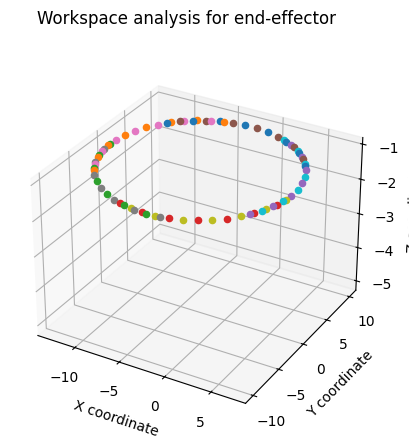

In [427]:
plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(-5, 5, -5, 'blue')
for i in range(72):
    ax.scatter3D(list6[i][0],list6[i][1],list6[i][2])
    plt.suptitle('Workspace analysis for end-effector')
    plt.xlabel('X coordinate')
    
    plt.ylabel('Y coordinate')
    ax.set_zlabel('Z coordinate')




In [ ]:
j[0]

array([1.2246468e-16, 2.0000000e+00, 1.0000000e+00, 1.0000000e+00])

# Inverse kinematics using Newton-Raphson method

### Finding the jacobian using geometric method

In [607]:
# Implementing the Newton-Raphson method, now that I have the jacobian matrix
posori = np.array([end[0],end[1],end[2]])
POSORI = np.expand_dims(posori, axis =0).transpose()
print(POSORI)
st1 = 9
st2 = 9
st3 = 9
st4 = 9
st5 = 9
st6 = 9
j=0

[[-2.8       ]
 [ 9.84807753]
 [ 0.63648178]]


In [608]:
Error_P = [500]
#while Err_theta>3:


for i in range(0,100):

    test2 = Forward(st1,st2,st3,st4,st5,st6)
    end2 = test2._endeff()[:,3]
    End2 = np.expand_dims(end2[:3],axis=0).transpose()
    #err_theta = np.subtract(POSORI[3:6], OR)
    #Err_theta = np.linalg.norm(err_theta)
    #Error_theta.insert(i,Err_theta)
    
    err_P = np.subtract(POSORI[0:3],End2)
    Err_P = np.linalg.norm(err_P)
    Error_P.insert(i,Err_P)
    alpha = 0.1
    if (Error_P[i]<Error_P[i-1]): 
        err_P = np.subtract(POSORI[0:3],End2)
        Err_P = np.linalg.norm(err_P)
        #Jv = J1[0:3]

        #U, D, Vt = np.linalg.svd(Jv, full_matrices=False)
        #threshold = 1e-10
        #D_inv = np.where(D > threshold, 1 / D, 0)
        #Jv_pseudo = Vt.T @ np.diag(D_inv) @ U.T

        J1 = test._Jacobian()
        Jv = J1[0:3]
        Jv_pseudo = np.linalg.pinv(Jv)

        ERR = np.expand_dims(Err_P, axis =0).transpose()
        norm_error = np.linalg.norm(ERR)

        D_theta = Jv_pseudo@err_P

        st1 = st1 + alpha*(D_theta[0][0])
        st2 = st2 + alpha*(D_theta[1][0])
        st3 = st3 + alpha*(D_theta[2][0])
        st4 = st4 + alpha*(D_theta[3][0])
        st5 = st5 + alpha*(D_theta[4][0])
        st6 = st6 + alpha*(D_theta[5][0])
        #print("st1: ",st1)

        if norm_error<0.1:
            print("""
            YESSSSS

            """)
            print("st1: ",st1)
            print("st2: ",st2)
            print("st3: ",st3)
            print("st4: ",st4)
            print("st5: ",st5)
            print("st6: ",st6)
            print("  ",i,  norm_error)
    # Error_theta.insert(i,Err_theta[i])

    else:
        st1 = st1 + alpha*(D_theta[0][0])/2
        st2 = st2 + alpha*(D_theta[1][0])/2
        st3 = st3 + alpha*(D_theta[2][0])/2
        st4 = st4 + alpha*(D_theta[3][0])/2
        st5 = st5 + alpha*(D_theta[4][0])/2
        st6 = st6 + alpha*(D_theta[5][0])/2
        print("Changes made and result is: ", norm_error)
        #print("st1: ",st1)
        if norm_error<0.1:
            print("""
            YESSSSS
            """)
            print("st1: ",st1)
            print("st2: ",st2)
            print("st3: ",st3)
            print("st4: ",st4)
            print("st5: ",st5)
    # print("st6: ",st6)
            print("  ",i,  norm_error)
    # print("""
    # Something went wrong
        #The following entry in the list is best
        #""",i-1)#Error_theta.insert(i,Err_theta[i])
        





Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.550574609037927
Changes made and result is:  18.55057460

In [609]:
print(norm_error)
err_P
print(End2)

print(st1)
print(st2)
print(st3)
print(st4)
print(st5)
print(st6)

18.550574609037927
[[ 0.17635   ]
 [-9.47769729]
 [ 0.40322303]]
9.0
9.090352364555267
9.090352364555267
8.57472791644933
9.090352364555267
9.428044863957245


In [ ]:
posori

array([-1.73565254, -2.58855601,  9.6834366 ])

In [ ]:
Min = (min(Error_theta))
Error_theta.index(Min)

1990

# Plotting delta(theta) vs time to inspect the function

array([[-0.08328035],
       [ 0.03083463],
       [ 0.0191938 ],
       [ 0.16821206],
       [-0.036094  ],
       [ 0.00241978]])

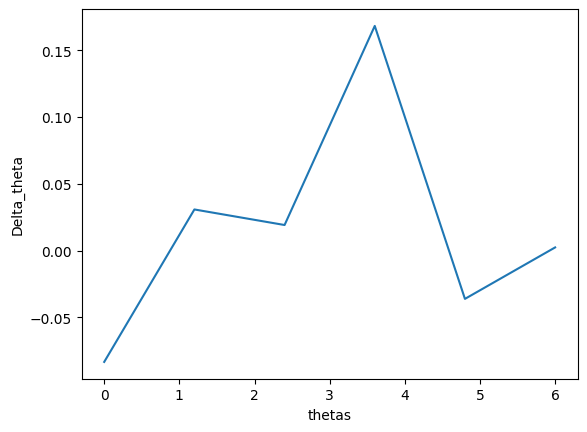

In [ ]:
plt.figure()
theta = np.array([np.linspace(0,6,6)]).transpose()
time = np.linspace(0,30,45)
plt.xlabel('thetas')
plt.ylabel('Delta_theta')
plt.plot(theta,D_theta)
D_theta

In [ ]:
T6 = test._endeff()
T6_inv = np.linalg.inv(T6)
print( T6_inv)



[[-6.1232340e-17 -1.0000000e+00 -2.4492936e-16  5.5000000e+00]
 [-6.1232340e-17 -1.2246468e-16  1.0000000e+00 -7.9000000e+00]
 [ 1.0000000e+00 -6.1232340e-17  6.1232340e-17  2.8000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


In [ ]:
_0T7 = T6@T7
_Tbd = T6_inv*_0T7

import scipy
mod_Vb = scipy.linalg.logm(_Tbd, disp=True)

In [ ]:
# Now finding jacobian 
Jx = test._Jacobian()
Jx_inv = scipy.linalg.pinv(Jx)

#T in the above case is not the transformation matrix, it is the column vector represeting POSORI. Now solving for complete IK


In [ ]:
# This is for end-effector-position 
# oi is from test()

Ori = np.expand_dims(oi,axis=0).transpose()
POS = np.expand_dims(end[:3],axis=0).transpose()

Position_orientation_des = np.append(POS,Ori)
Pos_ori_des = np.expand_dims(Position_orientation_des,axis=1)
print("Desired: ",Pos_ori_des)


# Now comes the actual end orientation 
test99 = Forward(10,10,10,10,10,10)
current_ori = test99._ori()
current_pos = test99._endeff()[:,3][:3]
Jbian = test99._Jacobian()

Current_ori = np.expand_dims(current_ori,axis=1)
Current_pos = np.expand_dims(current_pos,axis=1)

Current_posori = np.append(Current_pos,Current_ori)
CPOSORI = np.expand_dims(Current_posori,axis=1)
print("Current: ",CPOSORI)


Desired:  [[ -1.73565254]
 [ -2.58855601]
 [  9.6834366 ]
 [101.35522485]
 [ -0.47929355]
 [  2.83406768]]
Current:  [[ -2.14682128]
 [ -2.14285616]
 [  9.38047936]
 [ 81.0165694 ]
 [ -1.9603788 ]
 [168.67625437]]


In [ ]:
CPOSORI_inv = np.linalg.pinv(CPOSORI)
Tbd = CPOSORI_inv*Pos_ori_des

Jbian_psuedo = np.linalg.pinv(Jbian)

Body_twist = np.log(Tbd)
add = Jbian_psuedo*Body_twist

/var/folders/_w/16_87lc57jbgqlwj8mps_6_h0000gn/T/ipykernel_3321/192026979.py:6: RuntimeWarning: invalid value encountered in log
  Body_twist = np.log(Tbd)


In [547]:
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x5 = 0
x6 = 0

T6 = test._endeff()
Desired = np.linalg.inv(T6)
test99 = Forward(x1,x2,x3,x4,x5,x6)

In [526]:
#x1 = np.random.randint(5,50)
#x2 = np.random.randint(5,50)
#x3 = np.random.randint(5,50)
#4 = np.random.randint(5,50)
#x5 = np.random.randint(5,50)
#x6 = np.random.randint(5,50)

T6 = test._endeff()
Desired = np.linalg.inv(T6)
norm_W = 500

#while norm_W>0.03:

for i in range(50):
    test99 = Forward(x1,x2,x3,x4,x5,x6)

    Current = test99._endeff()

    # I will get angular velocity first 
    Current_inv = np.linalg.inv(Current)
    MAT = scipy.linalg.logm(Current_inv@Desired)
    # For space jacobian 
    Vs = adjoint(Current)@MAT


    Rot = Vs[:3,0:3]

    omega = 0.5*(Rot - Rot.T)
    W = np.array([omega[2,1],omega[0, 2], omega[1, 0]])
    V = Vs[:3,3]
    vw  = np.append(V,W)
    VW = np.expand_dims(vw,axis=1)
    norm_W = np.linalg.norm(W)


    Jbian = test99._Jacobian()
    Jbian_psuedo = np.linalg.pinv(Jbian)
    Additive= Jbian_psuedo@VW
    alpha = 0.01

    x1 = x1 + alpha*Additive[0][0]
    x2 = x2 + alpha*Additive[1][0]
    x3 = x3 + alpha*Additive[2][0]
    x4 = x4 + alpha*Additive[3][0]
    x5 = x5 + alpha*Additive[4][0]
    x6 = x6 + alpha*Additive[5][0]

    print('x1: ',x1)
    print('x2: ',x2)
    print('x3: ',x3)
    print('x4: ',x4)
    print('x5: ',x5)
    print('x6: ',x6)
    print(norm_W)

    





x1:  3.0
x2:  2.9949090441384274
x3:  2.9949090441384274
x4:  2.9999789794991494
x5:  3.008453128685377
x6:  3.013553491520856
0.017442578386205113
x1:  3.0
x2:  2.989761981653521
x3:  2.989761981653521
x4:  3.0001435612870306
x5:  3.017026843581157
x6:  3.027136852968047
0.016996245710267425
x1:  3.0
x2:  2.9845586848270003
x3:  2.9845586848270003
x4:  3.000494084213893
x5:  3.0257215655377094
x6:  3.0407509896000766
0.016557034198422693
x1:  3.0
x2:  2.9792991081102036
x3:  2.9792991081102036
x4:  3.0010307615950937
x5:  3.0345375568296413
x6:  3.0543966755238197
0.016125766289864764
x1:  3.0
x2:  2.973983287435908
x3:  2.973983287435908
x4:  3.0017536798204016
x5:  3.043474921944996
x6:  3.068074553454583
0.015703357225456373
x1:  3.0
x2:  2.968611339419798
x3:  2.968611339419798
x4:  3.002662797188933
x5:  3.0525336085929933
x6:  3.0817851346786354
0.015290821657720804
x1:  3.0
x2:  2.963183460444797
x3:  2.963183460444797
x4:  3.003757942985898
x5:  3.0617134089437767
x6:  3.09552

In [527]:
W

array([ 0.01965992, -0.00720366,  0.00300973])

In [528]:
test99._endeff()[:,3][:3]

array([-7.06739569, -9.1778947 , -0.79550131])

In [531]:
test._endeff()[:,3][:3]



array([-8.24021111, -8.39071529, -1.1       ])

# Now doing inverse dynamics 


In [523]:
def inverse_dynamics(p,F):
    # The above are the distances measured in the xyz frame 
    tau_x = p[1]*F[2] - (p[2]*F[1])
    tau_y = (p[2]*F[0]) - (p[0]*F[2])
    tau_z = (p[0]*F[1]) - (p[1]*F[0])

    #taux = ry*Fz - rz*Fy
    #tauy = rz*Fx - rx*Fz 
    #tauz = rx*Fy - ry*Fx   

    return np.array([tau_x,tau_y,tau_z])

p = np.array([1,1,1])
F = np.array([5,10,0])
Force = inverse_dynamics(p,F)


Jtoolw = test._Jacobian()[3:6]
Force_cartes = np.expand_dims(Force,axis=1)
tau_joints = -(Jtoolw.T@Force_cartes)
tau_joints


array([[ -0.],
       [-10.],
       [-10.],
       [  5.],
       [-10.],
       [ -5.]])

In [600]:
f = Forward(15,15,15,15,15,15)
i = Forward(0,0,0,0,0,0)

initial = np.array([0,0,0,0,0,0])
final = np.array([15,14,13,12,11,10])
print(initial)
print(final)

[0 0 0 0 0 0]
[15 14 13 12 11 10]


# Trajectory generation using cubic polynomial

In [614]:
f = Forward(15,15,15,15,15,15)
i = Forward(0,0,0,0,0,0)

initial = np.array([5,6,7,8,9,3])
final = np.array([15,14,13,12,11,10])
print(initial)
print(final)
tf = 5
t0 = 0
num_points = 100

T = 5
t = np.linspace(0,T,100)
a = initial 
a1 =0
a2 = (3/tf**2)*(final -initial)
a3 = (-2/tf**3)*(final -initial)
#trajectory = a + a1*t + a2*t**2 + a3*t**3

joint_trajectory = np.zeros((num_points, len(initial))) 
max_acc = []
for i in range(len(initial)):
        # Calculate coefficients for cubic polynomial
        a = initial[i]
        b = 0
        c = 3 * (final[i] - initial[i]) / (T**2)
        d = 2 * (initial[i] - final[i]) / (T**3)
        max_acc.insert(i,(6/(T**2))*(final[i]-initial[i])) # maximum accleration

        # Evaluate cubic polynomial for each time point
        joint_trajectory[:, i] = a + b * t+ c * t**2 + d * t**3




[5 6 7 8 9 3]
[15 14 13 12 11 10]


Text(0, 0.5, 'thetas')

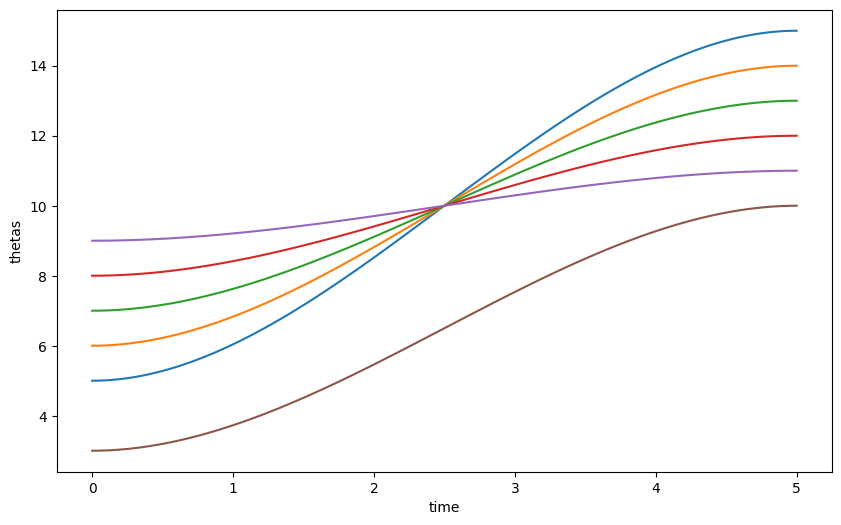

In [612]:
plt.figure(figsize=(10, 6))
for i in range(joint_trajectory.shape[1]):
    plt.plot(t, joint_trajectory[:, i], label=f'Joint {i+1}')

plt.xlabel('time')
plt.ylabel('thetas')


In [613]:
max_acc

[2.4, 1.92, 1.44, 0.96, 0.48, 1.68]

In [580]:
trajectory_points_x = np.polyval([a[0], a1, a2[0], a3[0]], t)
trajectory_points_y = np.polyval([a[1], a1, a2[1], a3[1]], t)
trajectory_points_z = np.polyval([a[2], a1, a2[1], a3[2]], t)

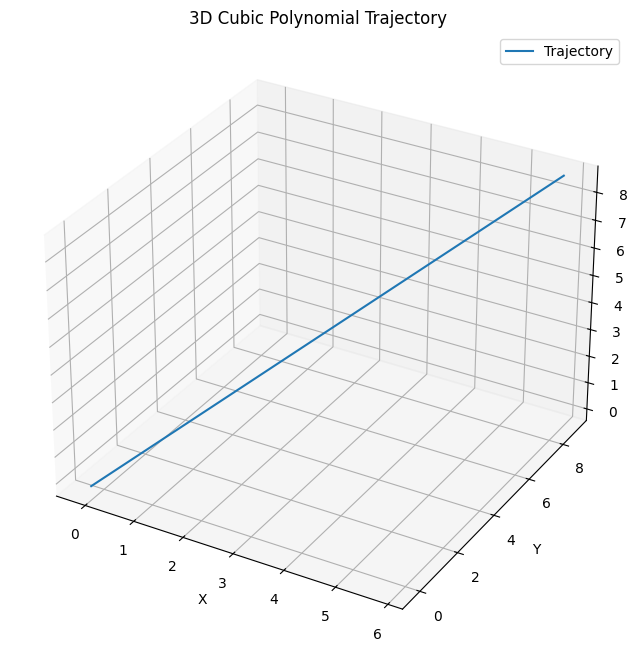

In [581]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory_points_x, trajectory_points_y, trajectory_points_z, label='Trajectory')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Cubic Polynomial Trajectory')

plt.legend()
plt.show()

In [ ]:
pip install pybullet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pybullet as p

#
p.connect(p.GUI)

robot_urdf_path = "/Users/abhimanyusuthar/anaconda3/Robotics/gitrepo/bullet3/examples/pybullet/gym/pybullet_data/xarm/xarm6_robot.urdf"
robot_id = p.loadURDF(robot_urdf_path, useFixedBase=True)



pybullet build time: Dec 16 2023 14:31:28


Version = 4.1 Metal - 88
Vendor = Apple
Renderer = Apple M2 Pro
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started


In [82]:
import time
initial_joint_angles = [m.radians(0), m.radians(30), m.radians(0), m.radians(-180), m.radians(0), m.radians(90),m.radians(0)]
for i in range(0,p.getNumJoints(robot_id)-1):
    p.resetJointState(robot_id, i, initial_joint_angles[i])

for i in range(500):
    p.stepSimulation()
    time.sleep(1/100) 

In [14]:
p.getNumJoints(robot_id)

7

In [44]:
# home configuration
initial_joint_angles = [0, 0, 0, 10, 0, -5,0]